## Anderson-Darling Test
* The Anderson-Darling test is a goodness-of-fit test that checks if your data comes from a specific distribution (often normal). 
* It places extra emphasis on the tails, making it more sensitive to deviations in the extremes compared to other tests like Shapiro-Wilk.

In [2]:
import numpy as np
from scipy.stats import anderson
import matplotlib.pyplot as plt

### Let's synthesize two datasets
1. Data from Normal Distribution
2. Data from Non-Normal Distribution (For ex: Exponential)

In [4]:
np.random.seed(101)
# Scenario 1: Normal data
normal_data = np.random.normal(loc=0, scale=1, size=200)
result_normal = anderson(normal_data, dist='norm')

# Scenario 2: Non-normal data (exponential)
non_normal_data = np.random.exponential(scale=1.0, size=200)
result_non_normal = anderson(non_normal_data, dist='norm')

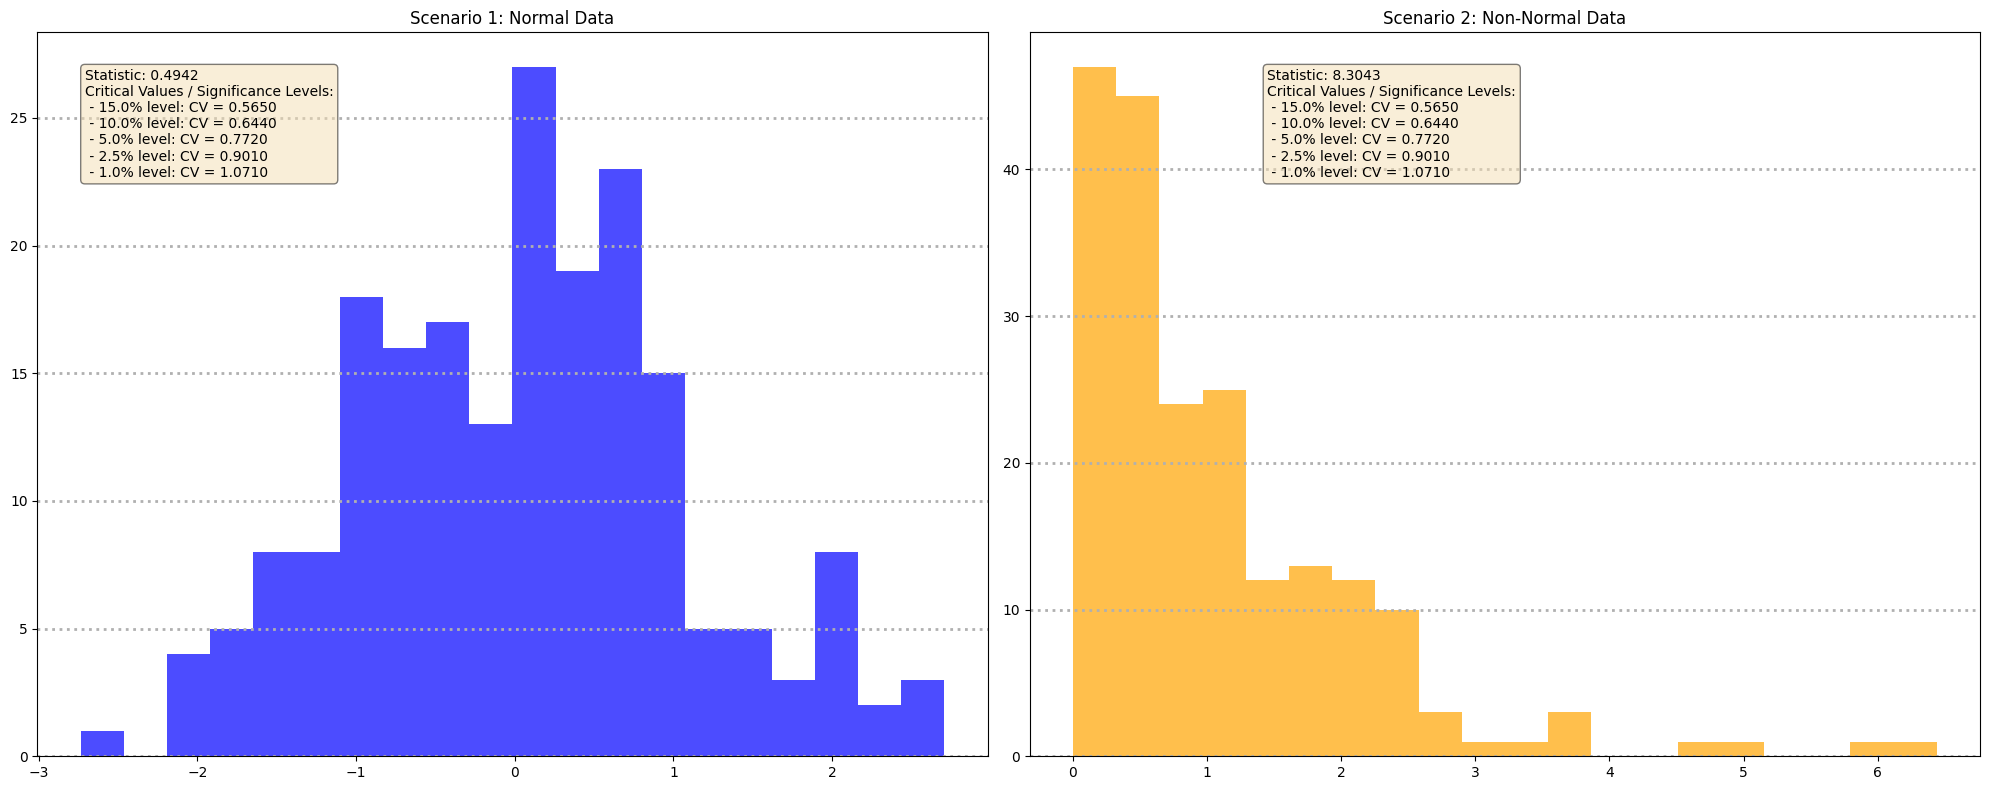

In [7]:
# Quick visualization
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].hist(normal_data, bins=20, color='blue', alpha=0.7)
axes[0].set_title("Scenario 1: Normal Data")

textstr_normal = '\n'.join((
    f"Statistic: {result_normal.statistic:.4f}",
    "Critical Values / Significance Levels:",
    *[f" - {sl}% level: CV = {cv:.4f}" for cv, sl in zip(result_normal.critical_values, result_normal.significance_level)]
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axes[0].text(0.05, 0.95, textstr_normal, transform=axes[0].transAxes, fontsize=10,
             verticalalignment='top', bbox=props)

axes[1].hist(non_normal_data, bins=20, color='orange', alpha=0.7)
axes[1].set_title("Scenario 2: Non-Normal Data")

textstr_non_normal = '\n'.join((
    f"Statistic: {result_non_normal.statistic:.4f}",
    "Critical Values / Significance Levels:",
    *[f" - {sl}% level: CV = {cv:.4f}" for cv, sl in zip(result_non_normal.critical_values, result_non_normal.significance_level)]
))
axes[1].text(0.25, 0.95, textstr_non_normal, transform=axes[1].transAxes, fontsize=10,
             verticalalignment='top', bbox=props)

axes[0].grid(lw=2, ls=':', axis='y')
axes[1].grid(lw=2, ls=':', axis='y')

axes[0].grid(lw=2, ls=':', axis='y')
axes[1].grid(lw=2, ls=':', axis='y')

plt.tight_layout()
plt.show()

#### You may see annotated in the above plots:
* For Normal Data, you’ll likely find the test statistic is below critical values, suggesting normality can’t be rejected.
* For Non-Normal Data, the test statistic is higher, indicating the data deviates from normal distribution — especially noticeable in the tail behavior.